# ATCM Network Structure Investigation
We're going to work out what the structure of the ATCM network is. First, let's read the data.

In [398]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
import powerlaw
from scipy.stats import spearmanr
from itertools import combinations
import csv


lower_year_threshold = 1960  # Define your lower year threshold
upper_year_threshold = 2024  # Define your upper year threshold



# Read the ATCM dataset and initialise it into a Pandas Dataframe
def read_ATCM_dataset():
    # Define the path to the Excel file
    file_path = 'ATCMDataset.xlsx'

    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path,sheet_name='ATCMDataset')
    df['Year'] = df['Year'].astype(int)

    # Display the DataFrame
    return df

# Df is the returned pandas dataframe.
df = read_ATCM_dataset()
print(df)


                            ID  DocumentID Type  Year  \
0          ATCM45_ip001_e.docx           0   ip  2023   
1          ATCM45_ip002_e.docx           1   ip  2023   
2     ATCM45_ip003_rev1_e.docx           2   ip  2023   
3          ATCM45_ip004_e.docx           3   ip  2023   
4          ATCM45_ip005_e.docx           4   ip  2023   
...                        ...         ...  ...   ...   
6308        ATCM1_wp025_e.docx        5237   wp  1961   
6309        ATCM1_wp029_e.docx        5238   wp  1961   
6310        ATCM1_wp031_e.docx        5239   wp  1961   
6311        ATCM1_wp033_e.docx        5240   wp  1961   
6312        ATCM1_wp034_e.docx        5241   wp  1961   

                                                  Title    Submitted By  \
0     Report by the CEP Observer to the XXXVII SCAR ...          France   
1     Report by the CCAMLR Observer to the Forty Fif...          CCAMLR   
2     Report by the United Kingdom as Depositary Gov...  United Kingdom   
3     Report of

# Initialise the Network- Step 1
Initialise the node names of the various countries. <br>


26
['Belgium', 'United Kingdom', 'China', 'SCAR', 'United States', 'Spain', 'Poland', 'Ukraine', 'South Africa', 'COMNAP', 'Norway', 'Chile', 'Germany', 'India', 'Russian Federation', 'France', 'Argentina', 'Korea (ROK)', 'Italy', 'Australia', 'New Zealand', 'IAATO', 'Uruguay', 'Japan', 'Brazil', 'Sweden']
26


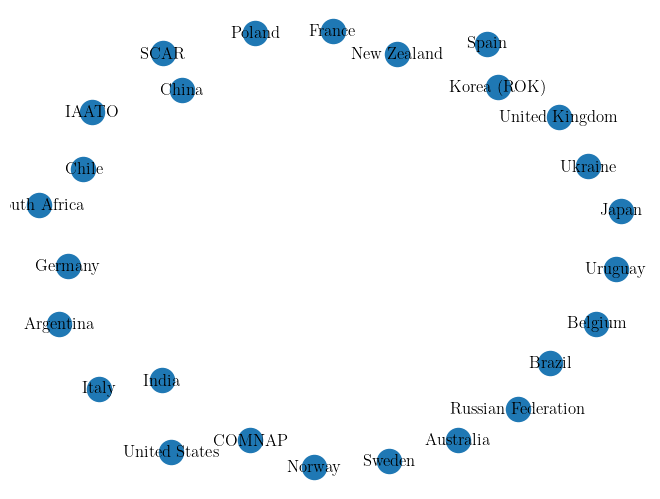

In [399]:
consultative_parties = [ 'SCAR','IAATO','COMNAP', 'United States', 'Ukraine', 'Belgium', 'New Zealand', 'Uruguay', 'Spain', 'Russian Federation', 'Italy', 'India', 'United Kingdom', 'Brazil', 'Poland', 'Japan', 'Argentina', 'China', 'Norway', 'South Africa', 'Chile', 'Sweden', 'Australia', 'Germany', 'France', 'Korea (ROK)']
print(len(consultative_parties))
def get_nodes(df):
    nodes=set()
    for row in df['Submitted By']:
        countries = [item.strip() for item in row.split(',')]
        countries=list(countries)
        countries=set(countries)
        nodes.update(countries)
    nodes=list(nodes)
        
    return nodes

# Filter the dataframe with only the WPs/IPs from lower_year_threshold to upper_year_threshold


filtered_df = df[(df['Year'] <= upper_year_threshold) & (df['Year'] >= lower_year_threshold)]

nodes=get_nodes(filtered_df)

nodes= list(set(nodes).intersection(set(consultative_parties)))
print(nodes)
print(len(nodes))


# Initialize the network in networkx
ATCM_network = nx.Graph()

# Add nodes to the graph
ATCM_network.add_nodes_from(nodes)
#ATCM_network.add_nodes_from(consultative_parties)

# Draw the network
nx.draw(ATCM_network, with_labels=True)
plt.show()
    

# Initialise the Network- Step 2
Create the graph with an edge between nodes $a$ and $b$ if they share at least one working paper. <br>
The weight of this edge is given by the number of working papers that $a$ and $b$ have collaborated on in the dataset. <br>

NODES
26
EDGES
301
AVERAGE DEGREE
23.153846153846153


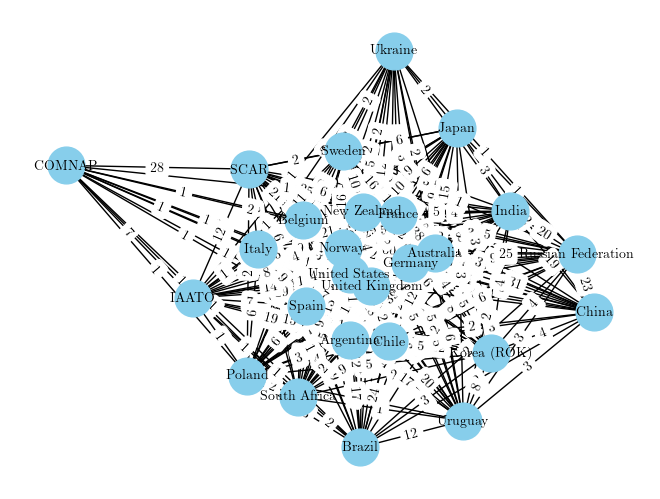

In [400]:
def add_edges(df,ATCM_network):
    nodes= list(ATCM_network.nodes)
    for n1 in nodes:
        for n2 in nodes:
            if n1 != n2:
                count=0
                for row in df['Submitted By']:
                    items = [item.strip() for item in row.split(',')]
                    if n1 in items and n2 in items:
                        count+=1
                        continue
                # Count is the total weight of the edge. 
                if count >=1:
                    ATCM_network.add_edge(n1,n2,weight=count)
    return

add_edges(filtered_df,ATCM_network)

# Visualize the network
pos = nx.spring_layout(ATCM_network)  # Positions for all nodes with specified spacing
nx.draw(ATCM_network, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(ATCM_network, 'weight')
nx.draw_networkx_edge_labels(ATCM_network, pos, edge_labels=edge_labels)
print("NODES")
print(ATCM_network.number_of_nodes())
print("EDGES")
print(ATCM_network.number_of_edges())
print("AVERAGE DEGREE")
avg_degree = np.mean([degree for _, degree in ATCM_network.degree()])
print(avg_degree)

plt.show()

# Check Degree Distribution of the network
Graph the degree distribution in Matplotlib and see what it looks like. 

Belgium 25
United Kingdom 25
China 19
SCAR 23
United States 25
Spain 24
Poland 24
Ukraine 20
South Africa 23
COMNAP 14
Norway 23
Chile 25
Germany 24
India 25
Russian Federation 23
France 24
Argentina 24
Korea (ROK) 25
Italy 24
Australia 25
New Zealand 24
IAATO 23
Uruguay 22
Japan 23
Brazil 22
Sweden 24
DEGREE SEQUENCE:  [25, 25, 19, 23, 25, 24, 24, 20, 23, 14, 23, 25, 24, 25, 23, 24, 24, 25, 24, 25, 24, 23, 22, 23, 22, 24]
Degree Distribution Power Law Fit Coefficients (a, b): [ 1.94345331e-13 -8.69233078e+00]


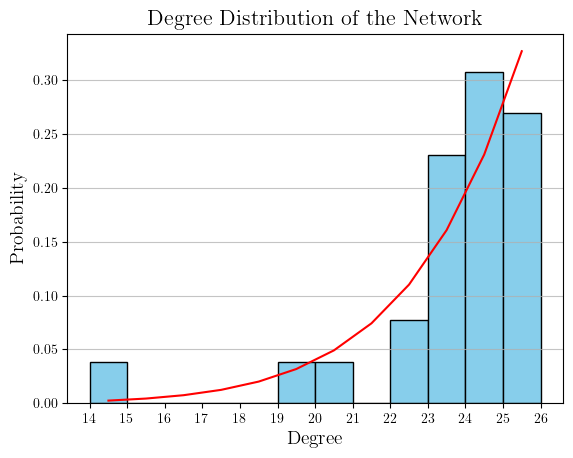

WEIGHT SEQUENCE:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 24, 25, 25, 25, 27, 28, 29, 29, 31, 31, 33, 36, 36, 38, 38, 39, 39, 40, 41, 43, 45, 47, 48, 48, 49, 50, 60, 62, 64, 72, 75, 79, 82,

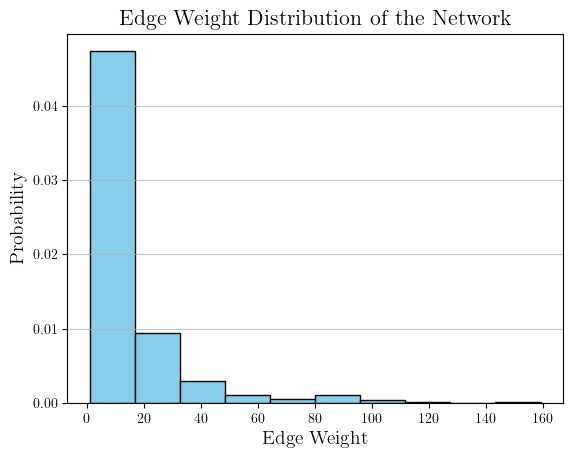

WEIGHT SEQUENCE: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 24, 25, 25, 25, 27, 28, 29, 29, 31, 31, 33, 36, 36, 38, 38, 39, 39, 40, 41, 43, 45, 47, 48, 48, 49, 50, 60, 62, 64, 72, 75, 79, 82, 

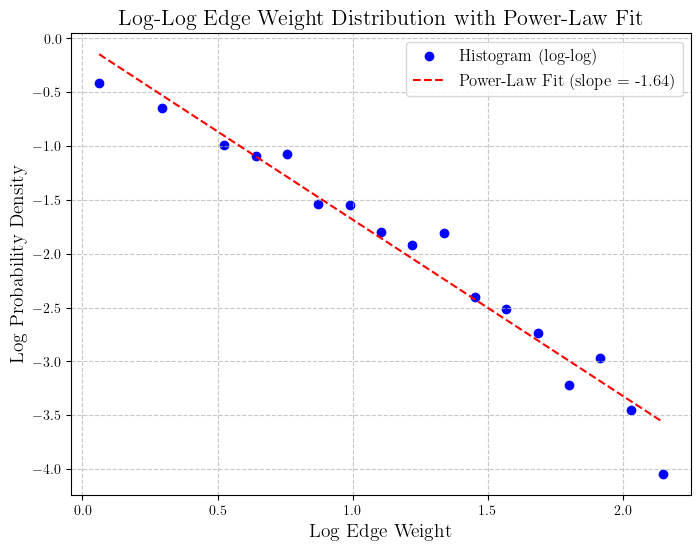

[('United Kingdom', 1036), ('United States', 775), ('Norway', 646), ('Australia', 643), ('New Zealand', 538), ('Argentina', 535), ('Chile', 527), ('Spain', 443), ('France', 407), ('Germany', 371), ('Belgium', 329), ('SCAR', 223), ('Sweden', 198), ('Italy', 190), ('India', 149), ('Brazil', 144), ('IAATO', 139), ('South Africa', 130), ('Russian Federation', 129), ('Uruguay', 127), ('Korea (ROK)', 121), ('Japan', 121), ('China', 116), ('Poland', 112), ('Ukraine', 61), ('COMNAP', 48)]
STRENGTHS
[48, 61, 112, 116, 121, 121, 127, 129, 130, 139, 144, 149, 190, 198, 223, 329, 371, 407, 443, 527, 535, 538, 643, 646, 775, 1036]
317.61538461538464


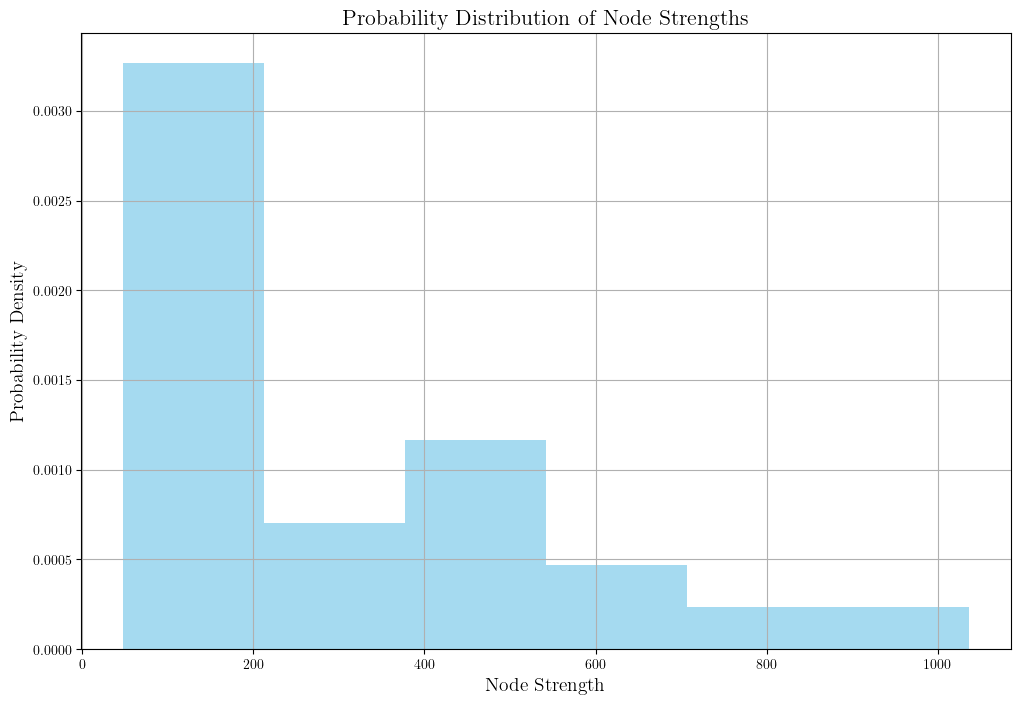

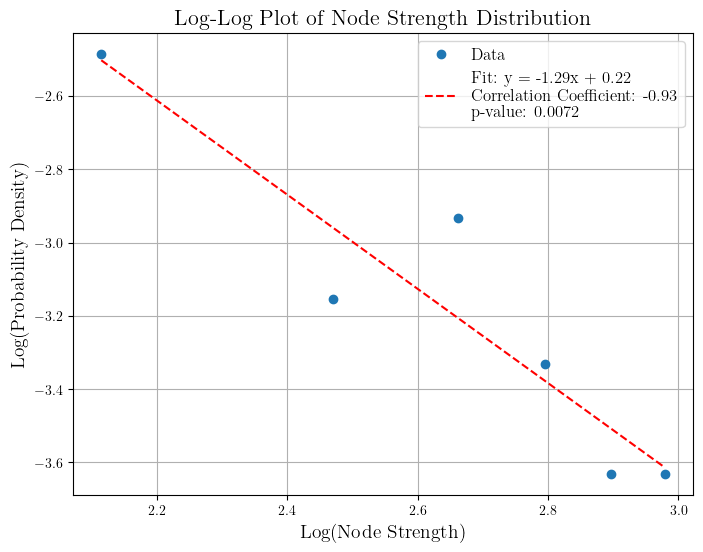

Correlation Coefficient: -0.93
p-value: 0.0072


In [401]:
# Plot a histogram of the degree.
def plot_degree_distribution(ATCM_network):

    # Define power-law function
    def power_law(x, a, b):
        return a * x**(-b)
    # Plot the degree distribution as a probability distribution
    degrees = [ATCM_network.degree(node) for node in ATCM_network.nodes()]
    for i in ATCM_network.nodes():
        print(i,ATCM_network.degree(i))
    print("DEGREE SEQUENCE: ", degrees)
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), density=True, color='skyblue', edgecolor='black')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Degree Distribution of the Network')
    plt.xticks(range(min(degrees), max(degrees) + 2))
    plt.grid(axis='y', alpha=0.75)

    # Regression model on the power law.
    bin_centers = np.array(range(min(degrees), max(degrees) + 1)) + 0.5
    hist, bin_edges = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 2), density=True)
    popt, _ = curve_fit(power_law, bin_centers, hist)


    print("Degree Distribution Power Law Fit Coefficients (a, b):", popt)
    plt.plot(bin_centers, power_law(bin_centers, *popt), 'r-', label='Power Law Fit')

    plt.show()

plot_degree_distribution(ATCM_network)

# Plot a similar histogram for the edge weights:
def plot_weight_distribution(ATCM_network):
    # Calculate edge weight distribution

    def power_law(x, a, b):
        return a * x**(-b)

    edge_weights = [ATCM_network[edge[0]][edge[1]]['weight'] for edge in ATCM_network.edges()]
    edge_weights.sort()
    print("WEIGHT SEQUENCE: ", edge_weights)
    # Plot the edge weight distribution
    plt.hist(edge_weights, density=True, color='skyblue', edgecolor='black')
    plt.xlabel('Edge Weight')
    plt.ylabel('Probability')
    plt.title('Edge Weight Distribution of the Network')
    
    plt.grid(axis='y', alpha=0.75)

    """
    hist, bin_edges = np.histogram(edge_weights, bins=np.sqrt(int(len(edge_weights)))+1, density=True)
    popt, _ = curve_fit(power_law, bin_centers, hist)
    print("Weight Distribution Fit Coefficients (a, b):", popt)
    plt.plot(power_law(bin_centers, *popt), 'r-', label='Exponential Fit')
    """

    

    plt.show()

plot_weight_distribution(ATCM_network)




# Enable LaTeX rendering in Matplotlib
plt.rcParams.update({
    "text.usetex": True,        # Use LaTeX for text rendering
    "font.family": "serif",     # Use serif font
    "axes.labelsize": 14,       # Font size for labels
    "axes.titlesize": 16,       # Font size for title
    "legend.fontsize": 12       # Font size for legend
})

def plot_log_log_weight_distribution(ATCM_network):
    # Extract edge weights
    edge_weights = [ATCM_network[edge[0]][edge[1]]['weight'] for edge in ATCM_network.edges()]
    
    if not edge_weights:
        print("No edges found in the network.")
        return

    edge_weights.sort()
    print("WEIGHT SEQUENCE:", edge_weights)

    # Compute histogram (log-binned)
    bins = np.logspace(np.log10(min(edge_weights)), np.log10(max(edge_weights)), num=20)
    hist, bin_edges = np.histogram(edge_weights, bins=bins, density=True)

    # Compute bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Remove zero values for log-log transformation
    mask = (hist > 0) & (bin_centers > 0)
    log_x = np.log10(bin_centers[mask])
    log_y = np.log10(hist[mask])

    # Fit a power-law (linear regression in log-log space)
    slope, intercept, r_value, p_value, _ = linregress(log_x, log_y)
    
    print(f"Power-law fit: y = {10**intercept:.4f} * x^{slope:.4f}")
    print(f"Correlation coefficient (R): {r_value:.4f}")
    print(f"Coefficient of determination (R²): {r_value**2:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Plot histogram in log-log scale
    plt.figure(figsize=(8, 6))
    plt.scatter(log_x, log_y, color='blue', label="Histogram (log-log)")
    
    # Plot fitted line
    fit_x = np.linspace(min(log_x), max(log_x), 100)
    fit_y = intercept + slope * fit_x
    plt.plot(fit_x, fit_y, 'r--', label=f"Power-Law Fit (slope = {slope:.2f})")

    plt.xlabel("Log Edge Weight")
    plt.ylabel("Log Probability Density")
    plt.title("Log-Log Edge Weight Distribution with Power-Law Fit")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.7)
    plt.show()

    

# Example usage:
# ATCM_network = nx.Graph()
# Add edges with weights before calling plot_log_log_weight_distribution(ATCM_network)
plot_log_log_weight_distribution(ATCM_network)



def plot_node_strength_distribution(ATCM_network):
    # Calculate node strengths (sum of weights of all connections for each node)
    node_strengths = {node: sum(data['weight'] for _, _, data in ATCM_network.edges(node, data=True)) for node in ATCM_network.nodes}
    sorted_strengths=sorted(node_strengths.items(), key=lambda x:x[1], reverse=True)
    print(sorted_strengths)
    
    # Extract strengths and plot the histogram
    strengths = list(node_strengths.values())
    print("STRENGTHS")
    strengths.sort()
    print(strengths)
    print(np.average(np.asarray(strengths)))

    
    
    plt.figure(figsize=(12, 8))
    plt.hist(strengths, bins=int(np.sqrt(ATCM_network.number_of_nodes()))+1, density=True, alpha=0.75, color='skyblue')
    plt.xlabel('Node Strength')
    plt.ylabel('Probability Density')
    plt.title('Probability Distribution of Node Strengths')
    plt.grid(True)
    plt.show()

plot_node_strength_distribution(ATCM_network)


def plot_log_log_strength_distribution(ATCM_network):
    # Calculate node strengths
    node_strengths = {node: sum(data['weight'] for _, _, data in ATCM_network.edges(node, data=True)) for node in ATCM_network.nodes}

    # Remove nodes with zero strength and calculate the log-log data
    filtered_strengths = [strength for strength in node_strengths.values() if strength > 0]
    hist, bin_edges = np.histogram(filtered_strengths, bins=int(np.sqrt(ATCM_network.number_of_nodes()))+1, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Filter out zero values in the histogram
    non_zero_indices = hist > 0
    hist = hist[non_zero_indices]
    bin_centers = bin_centers[non_zero_indices]

    # Calculate the logarithms
    log_bin_centers = np.log10(bin_centers)
    log_hist = np.log10(hist)

    # Fit a line to the log-log data using linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_bin_centers, log_hist)

    # Create the log-log plot
    plt.figure(figsize=(8, 6))
    plt.plot(log_bin_centers, log_hist, marker='o', linestyle='none', label='Data')
    plt.xlabel('Log(Node Strength)')
    plt.ylabel('Log(Probability Density)')
    plt.title('Log-Log Plot of Node Strength Distribution')

    # Plot the fitted line
    plt.plot(log_bin_centers, slope * log_bin_centers + intercept, color='red', linestyle='--', 
             label=f'Fit: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}\n'
                   f'p-value: {p_value:.4f}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the correlation coefficient and p-value
    print(f"Correlation Coefficient: {r_value:.2f}")
    print(f"p-value: {p_value:.4f}")
plot_log_log_strength_distribution(ATCM_network)



0.9409495548961424
0.9443148372095742


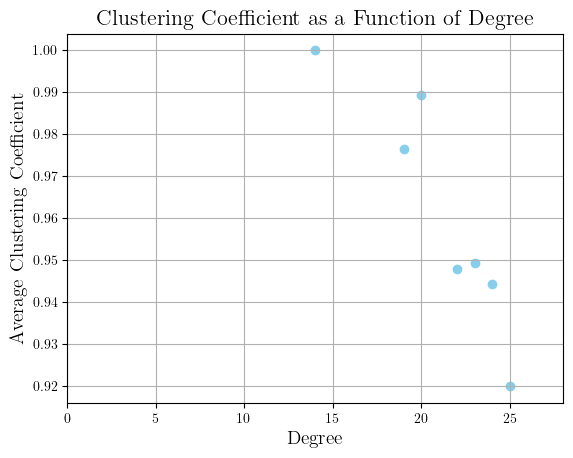

1.073846153846154
1.0015160128861094
-2.220446049250313e-16


In [402]:
# Clustering coefficient.
# Global clustering
print(nx.transitivity(ATCM_network))
# Average node clustering
print(nx.average_clustering(ATCM_network))

# Graph node clustering as a function of degree
def plot_clustering_vs_degree(G):
    degrees = dict(G.degree())
    clustering_coeffs = nx.clustering(G)

    degree_clustering = {}
    for node, degree in degrees.items():
        if degree not in degree_clustering:
            degree_clustering[degree] = []
        degree_clustering[degree].append(clustering_coeffs[node])

    avg_clustering = {degree: np.mean(clustering_coeffs) for degree, clustering_coeffs in degree_clustering.items()}
    
    degrees = list(avg_clustering.keys())
    clustering_values = list(avg_clustering.values())

    plt.scatter(degrees, clustering_values, color='skyblue')
    plt.xlabel('Degree')
    plt.ylabel('Average Clustering Coefficient')
    plt.xlim((0,28))
    plt.title('Clustering Coefficient as a Function of Degree')
    plt.grid(True)
    plt.show()

plot_clustering_vs_degree(ATCM_network)

# If we remove the disconnected bits and take the largest connected component, then we can run the small world measures.
largest_cc = max(nx.connected_components(ATCM_network), key=len)
sub = ATCM_network.subgraph(largest_cc).copy()

print(nx.average_shortest_path_length(sub))

print(nx.sigma(sub))
print(nx.omega(sub))

# Rank Correlation Analysis of Various timescales in the ATCM

Find the spearman rho (rank correlation) for the strength rankings.

In [403]:

def get_strength_rankings(t_lower, t_upper, df):
    consultative_parties = ['SCAR', 'IAATO', 'COMNAP', 'United States', 'Ukraine', 'Belgium', 'New Zealand', 
                            'Uruguay', 'Spain', 'Russian Federation', 'Italy', 'India', 'United Kingdom', 
                            'Brazil', 'Poland', 'Japan', 'Argentina', 'China', 'Norway', 'South Africa', 
                            'Chile', 'Sweden', 'Australia', 'Germany', 'France', 'Korea (ROK)']
    
    # Filter the dataframe for the specified time period
    filtered_df = df[(df['Year'] <= t_upper) & (df['Year'] >= t_lower)]
    
    # Get nodes (countries) involved in the given time frame
    nodes = get_nodes(filtered_df)
    
    # Retain only consultative parties
    nodes = list(set(nodes).intersection(set(consultative_parties)))
    
    # Initialize the network
    ATCM_network = nx.Graph()
    
    # Add nodes and edges to the network
    ATCM_network.add_nodes_from(nodes)
    add_edges(filtered_df, ATCM_network)
    
    # Calculate node strengths
    node_strengths = {node: sum(data['weight'] for _, _, data in ATCM_network.edges(node, data=True)) for node in ATCM_network.nodes}
    
    # Sort the nodes alphabetically
    sorted_node_strengths = sorted(node_strengths.items(), key=lambda item: item[0])
    
    return sorted_node_strengths



def calculate_spearman_rho(rankings_t1, rankings_t2):
    # Extract the countries and their strengths from both rankings
    countries_t1 = {country: strength for country, strength in rankings_t1}
    countries_t2 = {country: strength for country, strength in rankings_t2}
    
    # Ensure both rankings have the same countries (intersection)
    common_countries = set(countries_t1.keys()).intersection(set(countries_t2.keys()))
    
    # Sort the common countries alphabetically
    sorted_countries = sorted(common_countries)
    
    # Extract the strengths for the common countries
    strengths_t1 = [countries_t1[country] for country in sorted_countries]
    strengths_t2 = [countries_t2[country] for country in sorted_countries]
    
    # Calculate Spearman's rank correlation coefficient and p-value
    rho, p_value = spearmanr(strengths_t1, strengths_t2)
    
    return rho, p_value


periods=[1960, 1970,1980,1990,2000,2010,2023]



def is_subset_period(t1_lower, t1_upper, t2_lower, t2_upper):
    """
    Returns True if the period (t1_lower, t1_upper) is a subset of 
    (t2_lower, t2_upper) or vice versa.
    """
    return (t1_lower >= t2_lower and t1_upper <= t2_upper) or \
           (t2_lower >= t1_lower and t2_upper <= t1_upper)


def average_spearman_rho_with_test(periods, df, output_file):
    spearman_rhos = []
    p_values = []
    counted_pairs = set()  # Track unique pairs
    
    # Open the CSV file for writing
    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write header to the CSV file
        writer.writerow(['Period 1', 'Period 2', 'Spearman Rho', 'P-value'])

        # Generate combinations for t1 and t2 pairs in one loop
        for (t1_lower, t1_upper), (t2_lower, t2_upper) in combinations(combinations(periods, 2), 2):
            if (t1_lower, t1_upper) != (t2_lower, t2_upper) and not is_subset_period(t1_lower, t1_upper, t2_lower, t2_upper):
                # Ensure that pairs are stored in sorted order to avoid duplicates
                pair = tuple(sorted([(t1_lower, t1_upper), (t2_lower, t2_upper)]))
                if pair in counted_pairs:
                    continue  # Skip duplicate pairs

                counted_pairs.add(pair)  # Mark pair as processed

                rankings_t1 = get_strength_rankings(t1_lower, t1_upper, df)
                rankings_t2 = get_strength_rankings(t2_lower, t2_upper, df)

                # Calculate the Spearman rank correlation coefficient and p-value
                rho, p_value = calculate_spearman_rho(rankings_t1, rankings_t2)
                spearman_rhos.append(rho)
                p_values.append(p_value)

                # Write the result to the CSV file with time periods in "Lower - Upper" format
                writer.writerow([f"({t1_lower} - {t1_upper})", f"({t2_lower} - {t2_upper})", f"{rho:.2f}", f"{p_value:.2f}"])

    # Calculate the average Spearman rank correlation coefficient and p-value
    average_rho = sum(spearman_rhos) / len(spearman_rhos) if spearman_rhos else 0
    average_p_value = sum(p_values) / len(p_values) if p_values else 1

    return average_rho, average_p_value

# Specify the output CSV file path
output_file = 'spearman_rho_results.csv'

# Run the function
average_rho, average_p_value = average_spearman_rho_with_test(periods, df, output_file)

# Print average results
print(f"Average Spearman Rank Correlation Coefficient: {average_rho:.2f}")
print(f"Average p-value: {average_p_value:.2f}")

    

Average Spearman Rank Correlation Coefficient: 0.69
Average p-value: 0.03


# Consistent structure in ATS

Antarctic treaty is a constellation of treaties

Consistent structures --> Consistent across the systems (across the treaties) and consistent across time. Caveat: Early years of CCAMLR were one of flux. 

Worth thinking about the structure of the network. 

Co-authorship network. Reasonable metric of alignment and collaboration --> Used a lot elsewhere, co-sponsorship, politics etc...

Is this predictive of the actions. 

Can we predict which country wouldn't ratify? Which country would not have co-authored that paper. 